Practice of multivariable data vizualization by João Pedro Apolonio.
- KNN
- Heatmaps
- Clustering and evaluation with Randindex
- Dimensionality reduction (PCA)
Based on exercises given by Julien Gagneur at TUM.

In [14]:
!pip install pyreadr

In [15]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pyreadr
from sklearn.metrics import confusion_matrix, adjusted_rand_score
from sklearn import model_selection
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram


# So I do not have to write plt.plot()
%matplotlib inline

Section 01 - Visualizing multiple variables

In [16]:
# Carregue o arquivo RDS
dt1 = pyreadr.read_r(r'/content/drive/MyDrive/Colab Notebooks/Data science TUM/Data/extdata/cancer_data.rds')[None]
dt1.head()

,MYC,SRM,GBE1,FUK,UGP2,PRDX6,ATP6V1A,BCAT1,GLUD1,ATP6V1B2,GGPS1,POLD1,CAD,ALOX5,ASNS,PYCRL,PLCG2,GANAB,SEPHS1,GLUD2
DOHH2,-0.495015,0.209073,-0.436673,100.000000,100.000000,-0.208583,-0.051411,0.197500,-1.588511,0.606414,1.015733,0.431621,1.086766,0.235469,-0.338655,0.377149,-0.541951,0.119991,-0.792206,-0.753164
FARAGE,-0.491363,-0.355909,0.532208,0.103754,-0.649490,0.853678,0.582783,1.116467,1.350061,0.050270,-0.737583,-1.629394,0.160081,0.248119,-0.073632,-0.586918,0.232701,-0.470425,-1.031687,-0.139834
HT,-0.455994,-0.238525,0.671424,-1.013636,-0.965129,-0.480404,-0.923247,-1.124617,-0.319750,0.580138,-0.125961,-0.457667,-0.251649,-1.363059,-0.929329,0.298543,-0.101672,-0.197600,0.881220,-0.493419
Kapas231,1.615267,0.926663,1.016815,-0.997896,1.006484,1.121718,2.622680,-0.139736,1.082747,0.609479,-1.723106,-0.066013,-1.580867,1.892489,0.786433,-0.346331,1.042389,1.062637,-1.525772,2.024821
OCI-LY1,0.494273,2.400626,-1.425517,1.067607,0.986218,1.039540,-1.831517,-2.251518,-0.901666,-1.760212,1.225166,3.029640,0.583410,1.702037,1.899529,3.814041,1.975792,1.437689,1.025885,-2.137486


1. We are interested in the correlations between genes. Plot the pairwise correlations of the variables in the
dataset. Which pair of genes has the highest correlation?

UPG2 and FUK have the greatest correlations.

<Axes: >

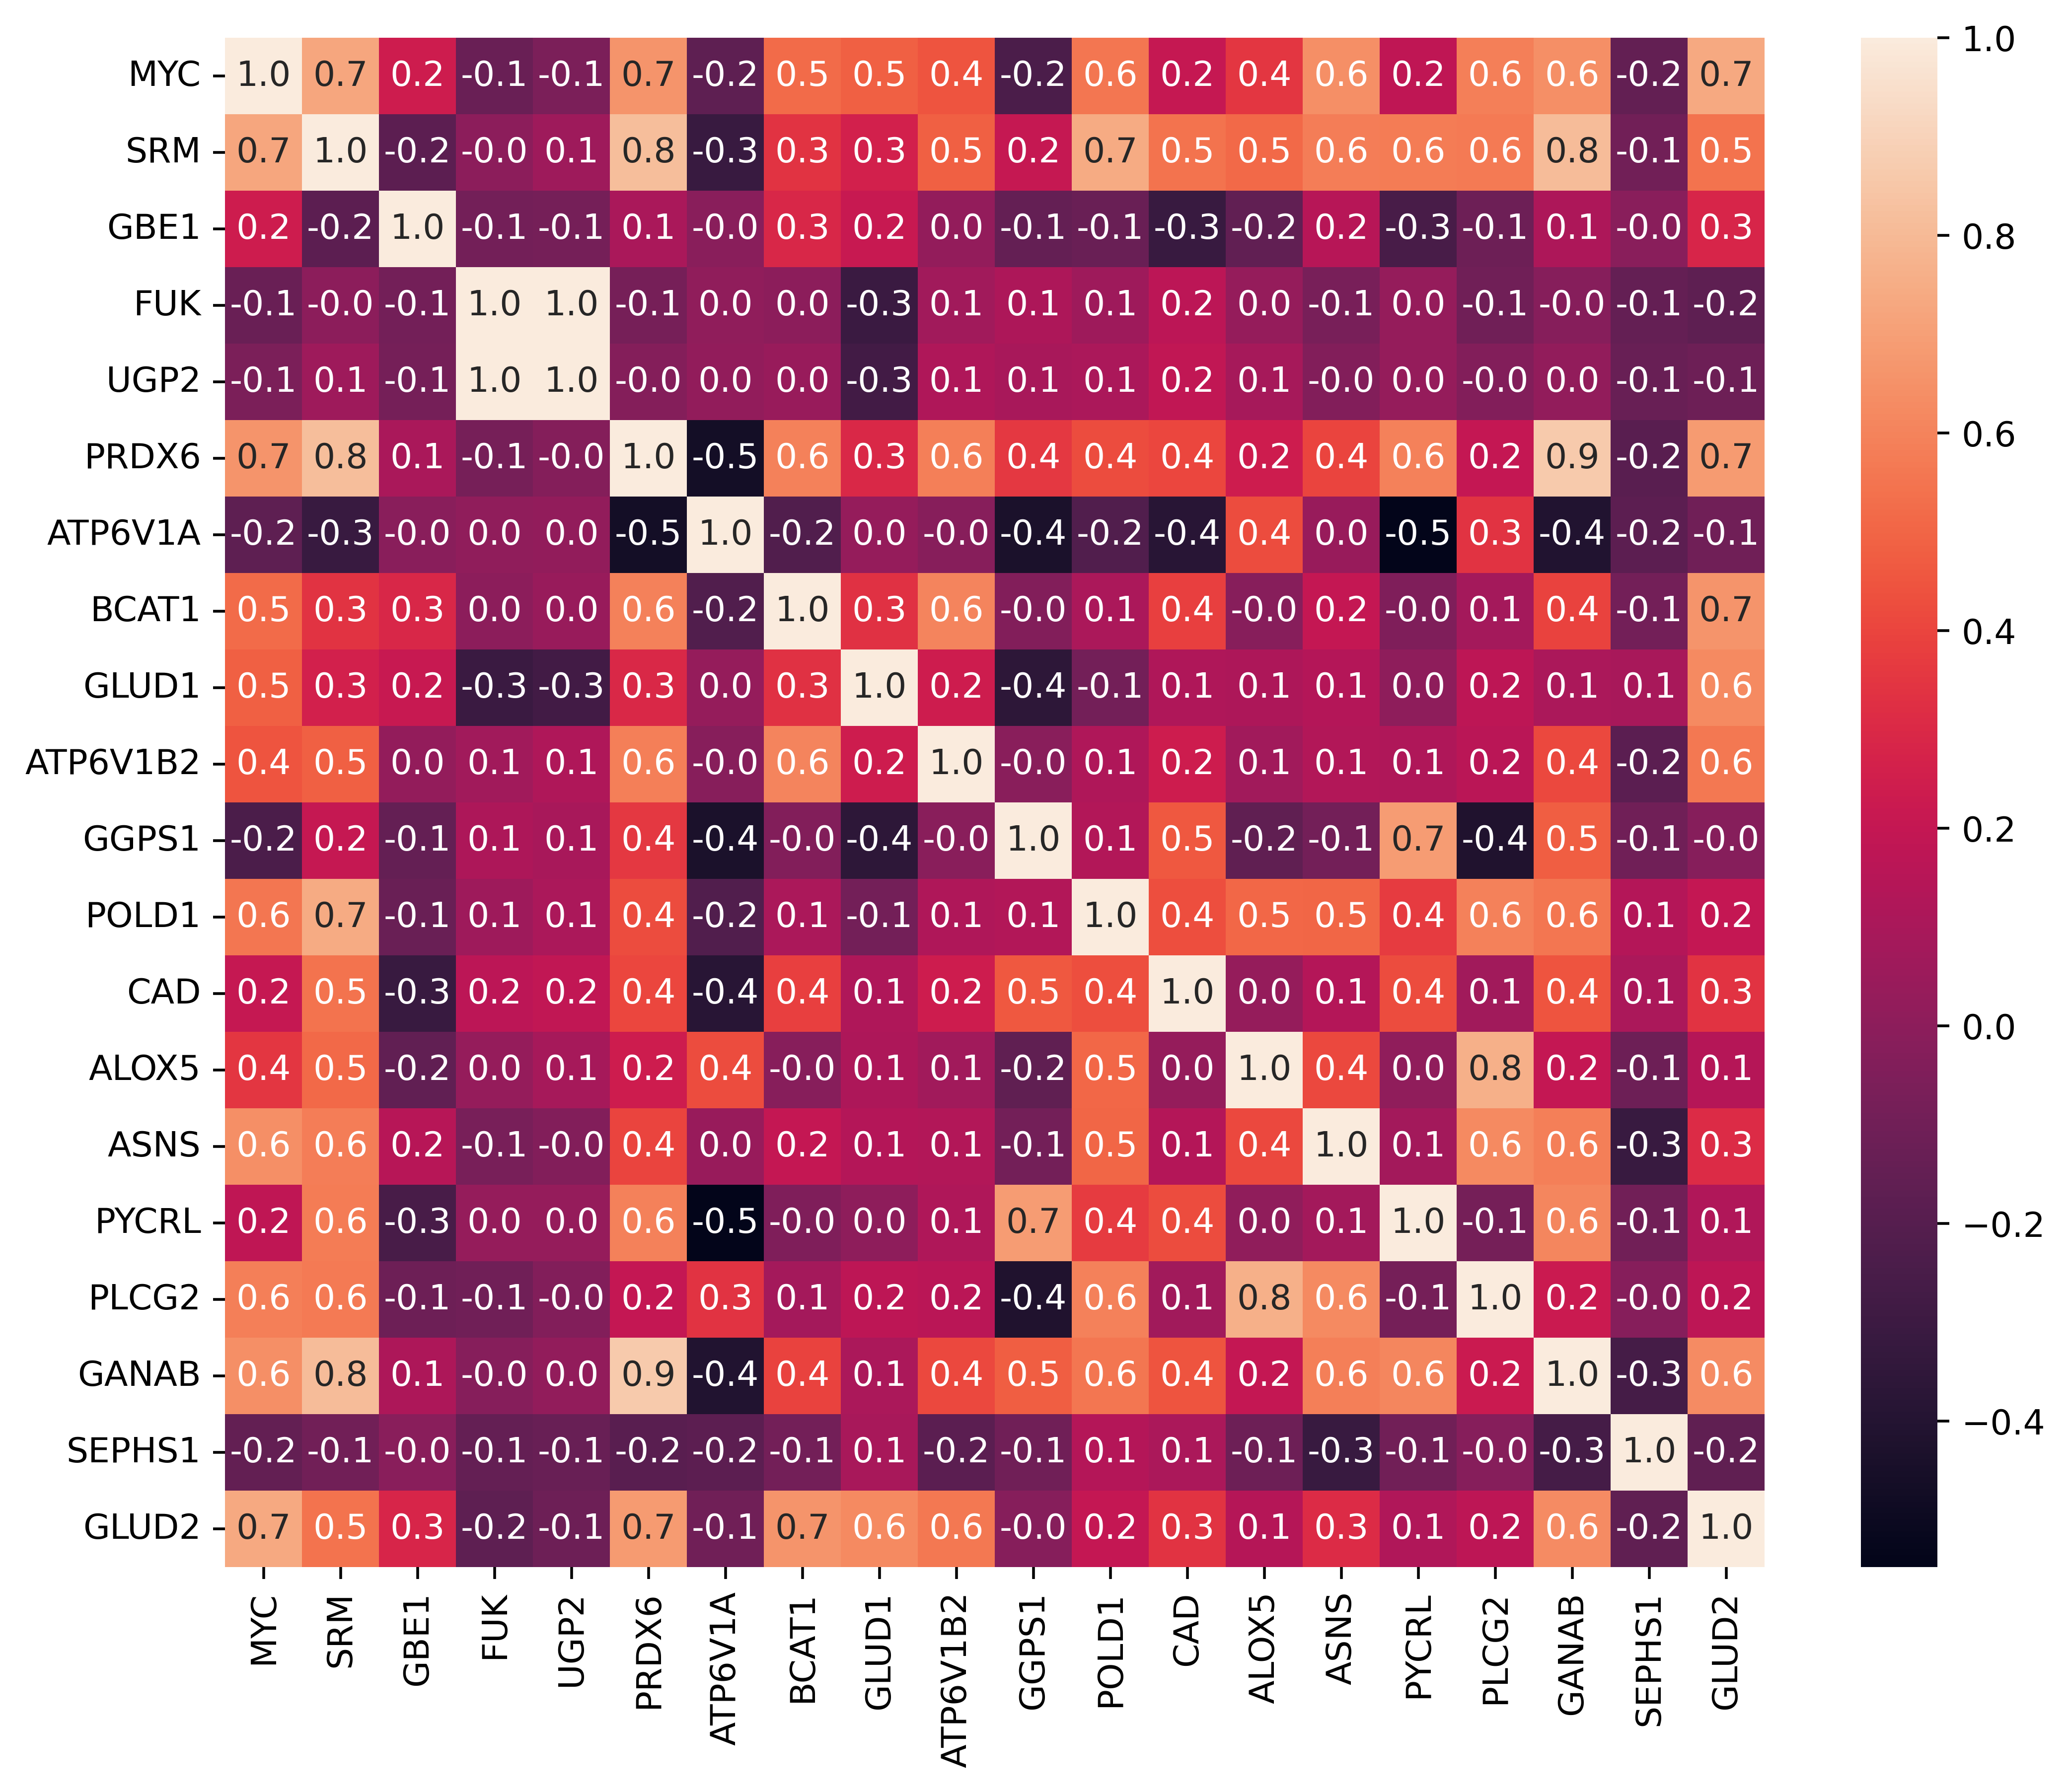

In [17]:
plt.figure(figsize=(10,8),dpi=500)
sns.heatmap(dt1.corr(),annot=True,fmt='.1f')

2. Visualize the raw data in a heatmap with pheatmap.

<Axes: >

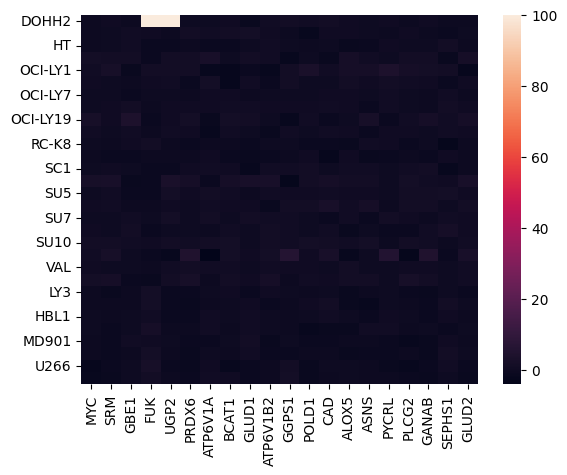

In [18]:
sns.heatmap(dt1)

3. Does the latter plot suggest some outliers? Could they have affected the correlations? Check by using an
appropriate plot the impact of these outliers on the correlations in question 1. Substitute them with missing
values (NA) and redo the previous questions 1 and 2.

There are outliers in the white squares. The high correlation is showed in the scatter plot of the two variables with highest scores. Setting the values to NA, we can better observe the differences between the other values.

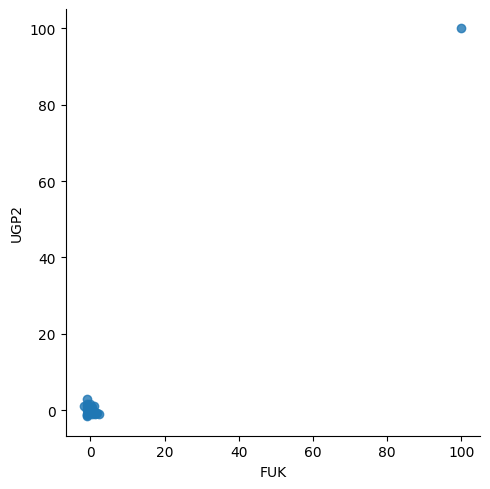

In [19]:
sns.lmplot(dt1.loc[:,['FUK','UGP2']],x='FUK',y='UGP2',fit_reg=False)

<Axes: >

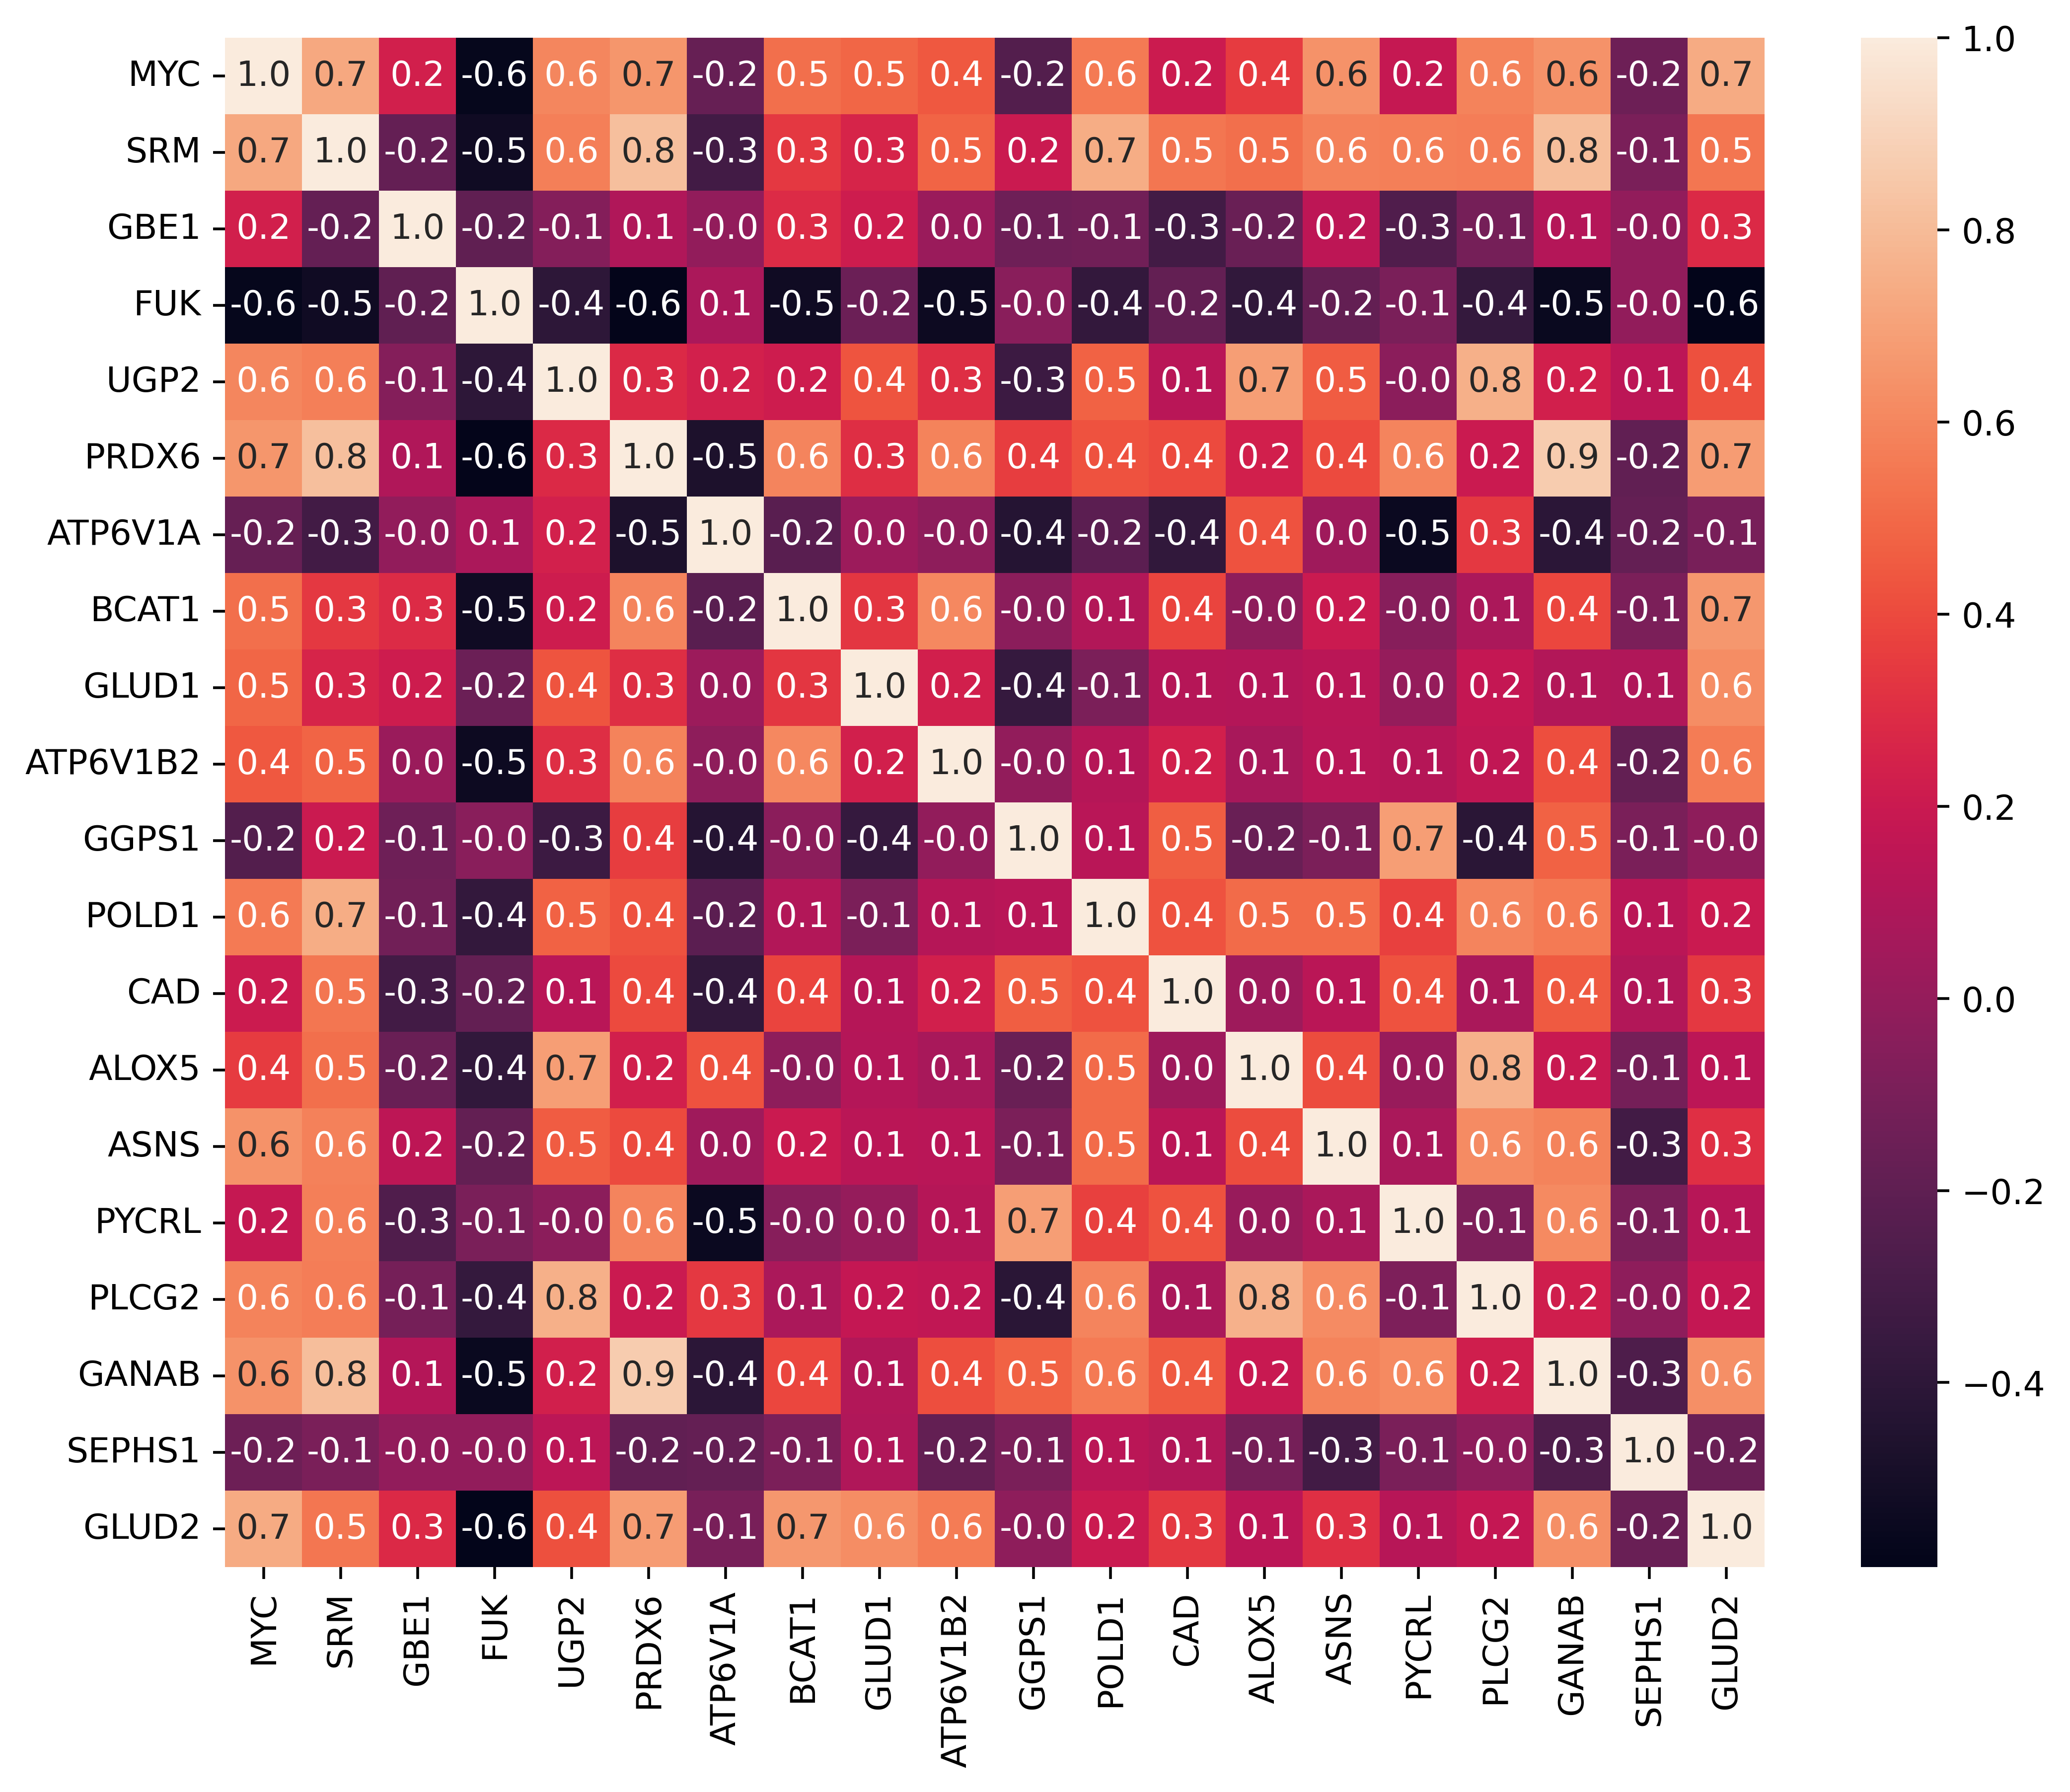

In [20]:
dt1.loc['DOHH2',['FUK','UGP2']]=np.nan

plt.figure(figsize=(10,8),dpi=500)
sns.heatmap(dt1.corr(),annot=True,fmt='.1f')

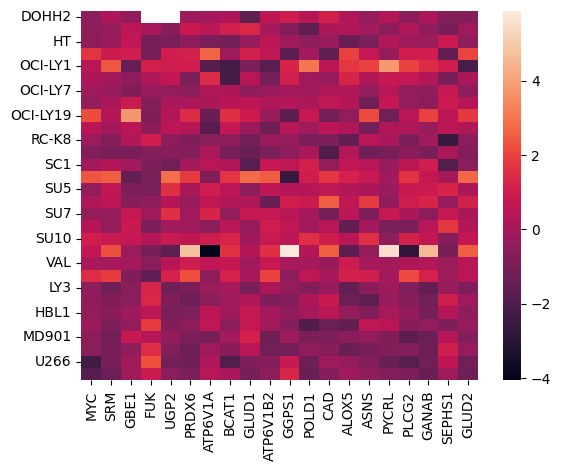

In [21]:
sns.heatmap(dt1)
plt.show()

Section 02 - Heatmaps and Hierarchical clustering

In [22]:
iris=sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


1. Consider the full iris data set without the Species column for clustering. Create a heatmap without clustering

<Axes: >

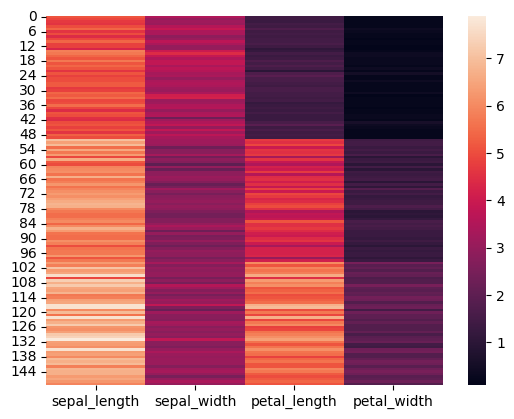

In [23]:
filtered_iris = iris.iloc[:,:4]
filtered_iris = filtered_iris.loc[:,['sepal_length','sepal_width','petal_length','petal_width']]
sns.heatmap(filtered_iris, )

2. Now, create a heatmap using complete linkage clustering of the rows of the data set.

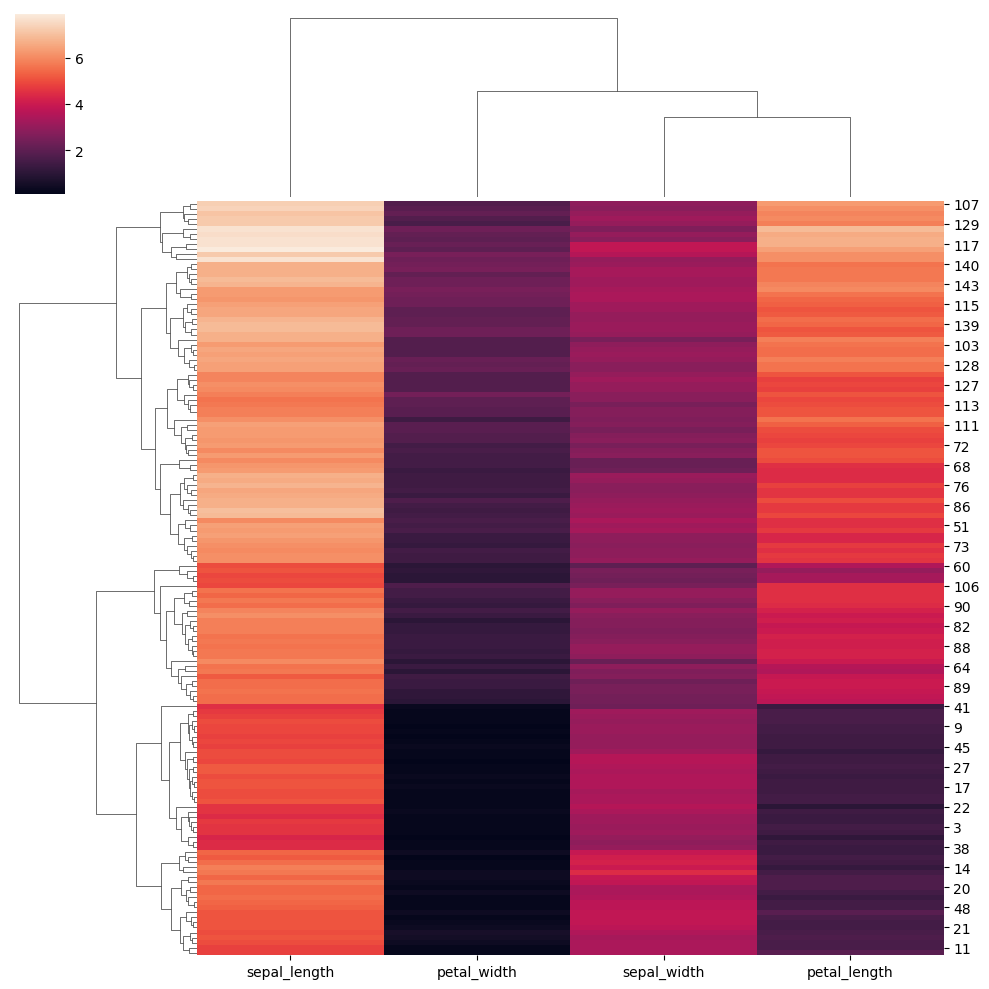

In [24]:
sns.clustermap(filtered_iris, method='complete')

3. Obtain the dendrogram of the row clustering using complete linkage clustering and partition the data
into 3 clusters.

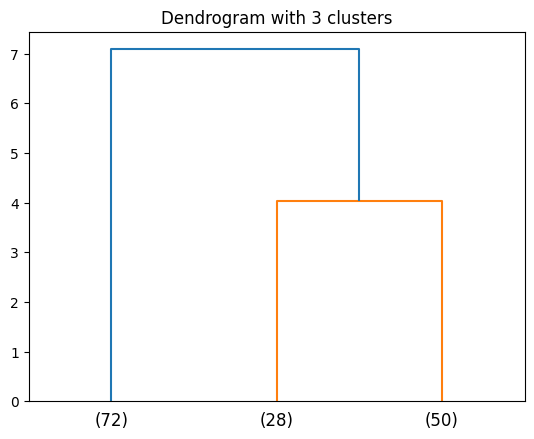

In [25]:
#como fazer os 2 tipos de clustering?

h_clustering = AgglomerativeClustering(n_clusters=3, linkage='complete')
h_clustering.fit(filtered_iris)

distances = linkage(filtered_iris,method='complete')

plt.title('Dendrogram with 3 clusters')
dendrogram(distances,truncate_mode='lastp',p=3)
clusters = fcluster(Z=distances, t=3, criterion='distance')

Section 03 - Clustering and Heatmaps

1.  Perform k-means clustering on the iris data set with k = 3.

In [26]:
kmeans=KMeans(n_clusters=3)
kmeans.fit(filtered_iris)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

3. Reproduce section 2 from the tutorial. Use the table function to compare the partitions from the complete
linkage and k-means clustering.

In [27]:
#pq ta diferente das soluçaõ?
conf_matrix=confusion_matrix(h_clustering.labels_,kmeans.labels_)
df_conf_matrix=pd.DataFrame(conf_matrix)
df_conf_matrix.head()

,0,1,2
0,34,0,38
1,0,50,0
2,28,0,0


4. Compute the pairwise Rand indices between the clustering results from the previous sections (complete,
average and k-means) and species label.

In [28]:
adjusted_rand_score(h_clustering.labels_,kmeans.labels_)

0.5630301178782049

Section 04 Dimensionality reduction with PCA

1. Let X be the iris data set without the Species column and only for the species setosa. Perform PCA on
X. Make sure that you scale and center the data before performing PCA.

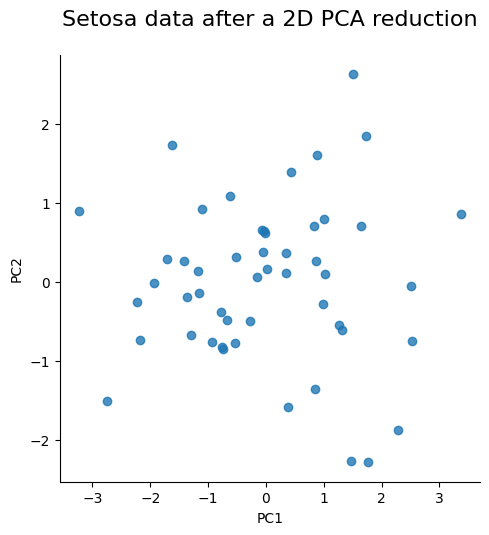

In [29]:
X = iris[iris['species']=="setosa"].iloc[:,:4]
norm_X = (X-np.mean(X,axis=0))/np.std(X,axis=0)
pca=PCA(2)
X_pca = pca.fit_transform(norm_X)
X_pca = pd.DataFrame(X_pca)
X_pca.columns=['PC1','PC2']
sns.lmplot(X_pca,x='PC1',y='PC2',fit_reg=False)
plt.title('Setosa data after a 2D PCA reduction',fontsize=16,y=1.05)
plt.show()


2. Which proportion of the variance is explained by each principle component?


In [30]:
print(f'The ratio of the variance explained by PC1 is {pca.explained_variance_ratio_[0]} and PC2 explains {pca.explained_variance_ratio_[1]}')

The ratio of the variance explained by PC1 is 0.514635053777053 and PC2 explains 0.25554456103948314
